# **データを読み込んで処理する**

## **データフレームとは**

Rにはデータを扱いやすくした「データフレーム」という形式があります。数値ベクトルや文字ベクトル，因子ベクトル（文字型ベクトル）などの異なる型のデータを行列の様にまとめて扱うことが出来ます。

### データフレームの作成
データフレームを0から作成するには、以下の様な書き方で作成できます。
```R
data.frame(列名=データ, 列名=データ, ... 列名=データ)
```
実際に適当なデータで作成してみると、

In [ ]:
# データフレームの作成例

# 各列のデータを用意
a <- c("Tomato","Tomato","Tomato","Pepper","Pepper","Pepper")
b <- c(58,62,77,73,66,69)
c <- c(12,15,13,21,22,19)

# データフレームを作成
x <- data.frame(Specie=a, Height=b, Weight=c)
x

データフレームにしておくことで、基本統計量などを簡単に表示することが出来ます。
```R
summary(データフレームの変数)
```

基本統計量は、ある列の値毎に算出したりも出来ます。

```R
by(データフレームの変数，データを分ける変数，関数名)
```

In [ ]:
# 例
summary(x)

In [ ]:
#種ごとに基本統計量を表示
by(x, x$Specie, summary)

### データフレームの各要素へのアクセス

データフレームの一部のデータを抽出したい時には、以下の様な書き方になります。

```R
# 列データの抽出
x$列名
x[ ,列番号]

# 行データの抽出
x[行番号, ]

# a行目b列目の値の抽出
x[行番号, 列番号]
```

In [ ]:
# 例
# 高さのデータだけ取り出す
x$Height

In [ ]:
# 2行目のデータを取り出す
x[2, ]

In [ ]:
# 2列目のデータを取り出す
x[, 2]

こうして取り出したデータに対して、平均値を計算する関数を適用したりすることも出来ます。

In [ ]:
# (例) 高さの平均値を見る
takasa <- x$Height # 高さを取り出す
mean(takasa)         # mean関数を適用

# まとめてしまっても良い
mean(x$Height)

また、条件を指定して条件に合うデータのみを抽出してくることも可能です。

前回If構文で学んだ比較演算子をここでも使います。

```R
# Specie列がTomatoのデータのみ抽出
x[x$Specie == "Tomato", ]

# Heightが70以上のデータのみ抽出
x[x$Height >= 70, ]
```

データフレームの`Specie`の列が"Tomato"の行を取り出す場合は

In [ ]:
# 例
# トマトのデータを取り出す
x[x$Specie == "Tomato", ]

データフレームのHeightの列が70以上の行を取り出す場合は

In [ ]:
# 例
# Heightが70以上のデータを取り出す
x[x$Height >= 70, ]

### **実習1**
**実習1-1**

下記のコードを埋めて、作成したデータフレーム`x`から、

重さ(Weight)が20以上のデータを取り出してください

In [ ]:
# 各列のデータを用意
a <- c("Tomato","Tomato","Tomato","Pepper","Pepper","Pepper")
b <- c(58,62,77,73,66,69)
c <- c(12,15,13,21,22,19)

# データフレームを作成
x <- data.frame(Specie=a, Height=b, Weight=c)

# Weightが20以上のデータを取り出す



**実習1-2**

下記のコードを埋めて、作成したデータフレームxから、

Specieが"Pepper"のデータを取り出し、重さ(Weight)の平均値を求めて下さい。

In [ ]:
# 各列のデータを用意
a <- c("Tomato","Tomato","Tomato","Pepper","Pepper","Pepper")
b <- c(58,62,77,73,66,69)
c <- c(12,15,13,21,22,19)

# データフレームを作成
x <- data.frame(Specie=a, Height=b, Weight=c)

# Specieが"Pepper"のデータを取り出す
x_pepper <- 

# 取り出したデータのWeightの平均値を求める



### **CSVファイル(Excelファイル)からデータを読み込む**

自分で手入力できるデータくらいなら、Excelでやってしまって、わざわざデータフレームにする必要を感じられないかもしれないですが、

より大きなデータを扱うときにデータフレームは便利になってきます。


今回はエクセルでは手動で見きれないような様なファイルをデータフレームとして読み込んでみましょう。

以下のサッカー選手のデータを読み込んでみます。

[2018-2019年のイングランドプレミアリーグのサッカー選手データ](https://github.com/slt666666/informatics_agri_1st/blob/main/source/_static/data/england-premier-league-players-2018-to-2019-stats.csv)

データをデータフレームとして読むには以下のように書きます。
```R
read.csv("ファイル名")
```

In [ ]:
# web上のデータを読む
df <- read.csv("https://raw.githubusercontent.com/slt666666/informatics_agri_1st/main/source/_static/data/england-premier-league-players-2018-to-2019-stats.csv")
# head(データフレーム) ... データフレームの最初の数行だけ表示
head(df)

#### **ExcelファイルとCSVファイル**
プログラムなどで扱えるようにするにはX「XXX.xlsx」というExcel用のフォーマットから「XXX.csv」というCSV()というカンマ(",")でデータが区切られたフォーマットに変える必要があります。

フォーマットを変えるにはExcelで保存するときに、フォーマットを変更して保存します。

<img src="https://github.com/slt666666/informatics_agri_1st/raw/main/source/_static/images/programming/excel_to_csv.png" alt="excel_to_csv" height="500px">

#### **Colabノートブックでのデータのアップロード**
今回はweb上のデータをダウンロードしてきましたが、皆さんが自分のデータを読み込ませたいときには、Colabノートブックにデータをアップロードする必要があります。左のフォルダマークからアップロードしましょう。

<img src="https://github.com/slt666666/informatics_agri_1st/raw/main/source/_static/images/programming/file_upload.png" alt="file_upload" height="450px">

### **実習2**
先程のサッカー選手のデータについて、

**課題2_1.** 

年齢が30歳以上の選手の総プレイ時間(minutes_played_overall)の最大値を求めて下さい。

最大値は`max`関数で求まります。

**課題2_2.** 

年齢が20歳以下のポジション(position)がDefenderの選手のデータを表示してください。



In [7]:
# web上のデータを読む
df <- read.csv("https://raw.githubusercontent.com/slt666666/informatics_agri_1st/main/source/_static/data/england-premier-league-players-2018-to-2019-stats.csv")

# 課題1_1


# 課題1_2




#### 解答例

In [ ]:
# web上のデータを読む
df <- read.csv("https://raw.githubusercontent.com/slt666666/informatics_agri_1st/main/source/_static/data/england-premier-league-players-2018-to-2019-stats.csv")

# 課題1_1
max(df[df$age >= 30, "minutes_played_overall"])
# 課題1_2
df[(df$age <= 20) & (df$position == "Defender"), ]

### **データフレームの出力**

作成したり編集したデータフレームは、ファイルとして出力することが出来ます。
```R
write.table(データフレーム名変数, "出力するファイルの名前", sep=区切り文字)
```

In [ ]:
# 例えば35歳以上の選手のデータをover35.csvというファイル名で出力するには
new_df <- df[df$age >= 35, ]
print(new_df)
write.table(new_df, "over35.csv", sep=",")

今回は全ての機能を紹介することは出来ませんが、他にもデータフレームを結合したり、データをソートしたりと、様々な機能があります。

# **関数を作る**

文字を表示する`print`関数や平均値を計算する`mean`関数など、Rには様々な関数が用意されていますが、自分でこの関数を作成することも出来ます。

以下の様な書き方をします。
```R
関数名 <- function(引数) {
  処理内容
  return(返す値)
}
```

例えば、$x$を入力すると、$x^2+3$の値を計算して返してくれる機能を持った関数を作りたいとすると、下記の様なコードになります。

In [ ]:
# 引数の2乗+3の値を返す関数
new_kansuu <- function(x) {
  answer <- x*x + 3
  return (answer)
}

new_kansuu(8)

# 統計解析

Rは統計解析が得意な言語のひとつなので、様々な統計処理を行うことが可能です。

回帰分析をやってみましょう。

# **簡単なグラフを描く**

`plot`関数で散布図や折れ線グラフなど様々なグラフを描くことが出来ます。

ただし、Rでグラフを描写する際にはこの後紹介するggplotというパッケージ(パッケージに関しても後述)を使うことが多いので、ここでは`plot`関数の基本的な使い方のみ紹介します。

基本的にはグラフ化したいデータを用意して、`plot`関数の引数に指定する形になります。
```R
x <- ベクトルなどのデータ
plot(x)
```

直接データを入れると、散布図が描かれます。

In [ ]:
# 例
x <- c(1, 3, 5, 7, 9, 10, 8, 6, 4, 2)
plot(x)

`plot`関数は引数で`type`を指定することで様々なグラフを描くことが出来ます。

```R
x <- ベクトルなどのデータ
plot(x, type="l")
```
* type="l" ... 線プロット(折れ線グラフ)
* type="b" ... 点と線のプロット
* type="c" ... "b" において点を描かないプロット
* type="o" ... 点プロットと線プロットの重ね書き
* type="h" ... 各点から x 軸までの垂線プロット
* type="s" ... 左側の値にもとづいて階段状に結ぶ

In [ ]:
# 例
x <- c(1, 3, 5, 7, 9, 10, 8, 6, 4, 2)
plot(x, type="l")

また、数学の関数をデータとして入れることで、そのグラフを描くことも出来ます。

 ```
 plot(関数名, 下限, 上限)
 ```
 ここでの関数名とはsinやcosといった三角関数や、$x^2+4x+3$の様な任意の関数式を示します。

In [ ]:
kansuu <- function(x) {
  return (x*x + 4*x +3)
}
plot(kansuu, 0, 10)

# **パッケージを使う**

パッケージとは、関数やデータセットを集めたものです。 Rでは、パッケージをインストールすることで、 機能を拡張することが出来る仕組みになっています。

例えば、Rには綺麗なグラフ図を描くggplot2パッケージというものがあります。
先程描いたグラフでも最低限の描写は出来ますが、ライブラリを使うことでより見やすいグラフの描写が出来る関数が使えるようになります。

他にも、データフレームをより扱いやすくするdplyrパッケージや、機械学習・統計解析・3Dモデル・ネットワーク図の作成など、それぞれの目的に応じたパッケージが数多く開発されています。

<img src="https://github.com/slt666666/informatics_agri_1st/raw/main/source/_static/images/programming/packages.png" alt="packages" height="250px">

Google colaboratoryでは、有名なパッケージはインストールされているので、パッケージを読み込むだけで使えるのですが、通常(自分のPCで動かす場合など)は、一度パッケージをインストールする必要があります。
```R
install.packages("インストールしたいパッケージ名")
```

一度インストールしたパッケージは下記のコードで呼び出せるようになります。
```R
library(パッケージ名)
```

さきほど読み込んだサッカー選手のデータをggplotで可視化してみましょう。

データとしては、
```R
df$age ... 年齢
df$position ... ポジション ('Defender''Midfielder''Forward''Goalkeeper')
df$minutes_played_overall ... 総プレイ時間
df$goals_overall ... ゴール数
df$assists_overall ... アシスト数
```
あたりを使います。

ggplotの使い方は
```R
# データの指定
p <- ggplot(データフレーム名, aes(x=データフレームの列名, y=データフレームの列名))
# 描くグラフの種類を加えていく
p <- p + geom_point()
# グラフを表示
p
```

サッカー選手の年齢をx軸に、総ゴール数をy軸に設定して散布図を描いてみます。

In [ ]:
# ggplot2を呼び出す
library(ggplot2)

p <- ggplot(df, aes(x=age, y=goals_overall))
p <- p + geom_point()
p

どうやら0歳の人が混ざっているようです。こういった外れ値や入力ミスなどを見つけやすくなるのもグラフ化の良い所ですね。

この0歳の人を省いてグラフ化してみましょう。

In [ ]:
df <- df[df$age > 0, ]
p <- ggplot(df, aes(x=age, y=goals_overall))
p <- p + geom_point()
p

また、データに基づいて色を分けて表示することも出来ます。
下記の様にデータ指定の際に、`colour=列名`を追加します。

```R
# データの指定
p <- ggplot(データフレーム名, aes(x=データフレームの列名, y=データフレームの列名, colour=データフレームの列名))
# 描くグラフの種類を加えていく
p <- p + geom_point()
# グラフを表示
p
```

今回は先程の散布図にポジションごとに色を付けてみます。

In [ ]:
p <- ggplot(df, aes(x=age, y=goals_overall, colour=position))
p <- p + geom_point()
p

# シミュレーションをRで実行してみる。
Excelの実習の際に、ロトカ・ヴォルテラ方程式というものを実装してみました。

被食者・捕食者の数が時間の経過とともにどの様に移り変わっていくのか、というモデルですね。

<img src="https://github.com/slt666666/informatics_agri_1st/raw/main/source/_static/images/programming/simulation.png" alt="simulation" height="200px">

<img src="https://informatics-agri-1st.readthedocs.io/ja/latest/_images/Lotka_Volterra_equation_Maple_plot.png" alt="packages" height="250px">

Excelでは関数やオートフィルを使って実装しましたが、今回はRでの実装例を見てみましょう。
計算した結果をggplotで可視化してみます。

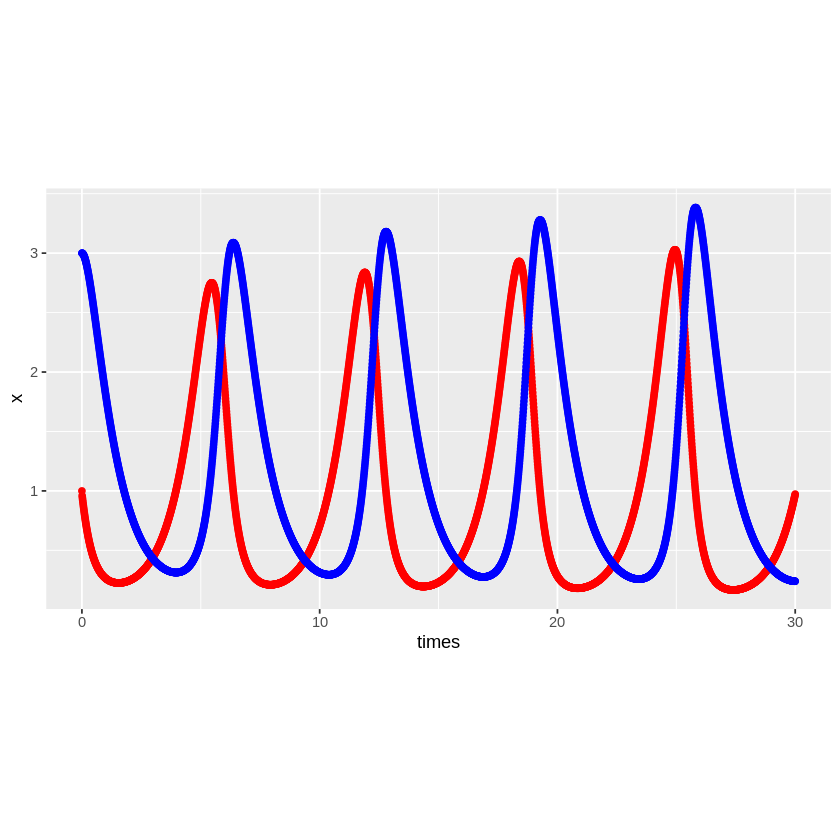

In [64]:
library(ggplot2)

#各パラメータの設定
a <- 1.2
b <- 1
c <- 1
d <- 1

# x, yのベクトル(入れ物)を作り初期値を入れる
x <- c(1)
y <- c(3)

# dx/dt, dy/dtの初期値
dx_dt <- -4
dy_dt <- 0

# 経過時間とx,yを確認した時間の入れ物
passed_time <- 0.01
times <- c(0)

# 時間0.01を1000回進めた場合
for (t in 1:3000) {

  # 時間(0.01)経過後のx, yの個体数
  new_x <- x[length(x)] + passed_time * dx_dt
  new_y <- y[length(y)] + passed_time * dy_dt

  # x, y, timesの入れ物に加える
  x <- c(x, new_x)
  y <- c(y, new_y)

  # 現在の時間を計算し、入れ物に加える
  times <- c(times, times[length(times)]+passed_time)

  # 次のdx/dt, dy/dtの計算
  dx_dt <- a * new_x - b * new_x * new_y
  dy_dt <- c * new_x * new_y - d * new_y

}

# データフレームを作成
data <- data.frame(time=times, x=x, y=y)

# ggplotでグラフ描写
p1 <- ggplot(data) + geom_point(aes(x=times,y=x),color="red")
p2 <-geom_point(aes(x=time,y=y),color="blue")
p <- p1 + p2 + coord_fixed(5) # サイズを調整
print(p)

---
## まとめ

　今回のページでは、Rの基礎その2を勉強しました。
- データベースについて
- 関数の作成
- 簡単な統計解析
- 簡単なグラフを描く
- パッケージの使い方
- シミュレーション

など。

それぞれについてあまり深くは説明しませんでしたが、

このあたりまでくれば、自分で必要なパッケージなどを探してきて、

様々な用途にRを使えるようになっているはずです。